<a href="https://colab.research.google.com/github/okaysourav/DA_EDA/blob/main/eda_th_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Sourav Yadav
# Reg No: 21BDS0246
# Course Code: BCSE331L
# Course Name: Exploratory Data Analysis
# Slot: C1
# Submitted To: Prof. Prakash M
# Theory DA

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist, squareform
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


Module:1 Introduction to Exploratory Data Analysis
Introduction to Exploratory Data Analysis (EDA) –Steps in EDA, Data Types: Numerical
Data – Discrete data, continuous data – Categorical data – Measurement Scales: Nominal,
Ordinal, Interval, Ratio – Comparing EDA with classical and Bayesian Analysis – Software
tools for EDA.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None

First 5 Rows of the Dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   


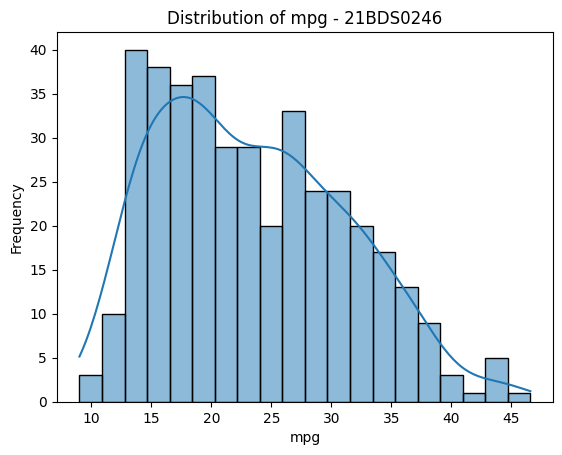

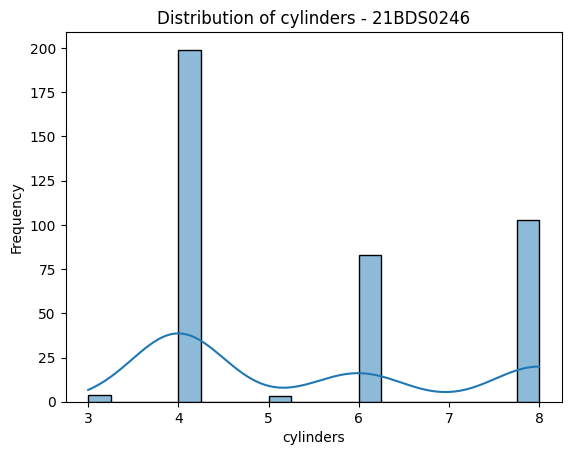

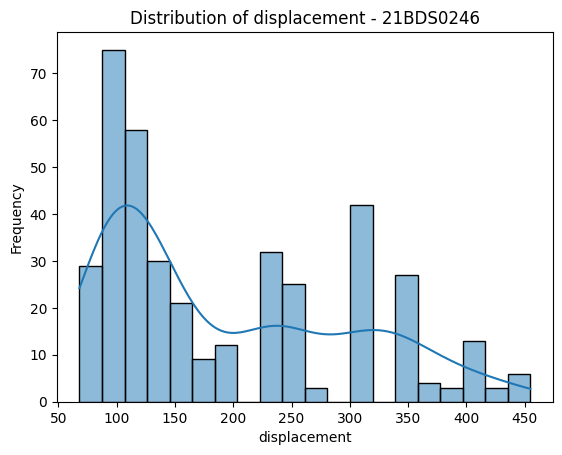

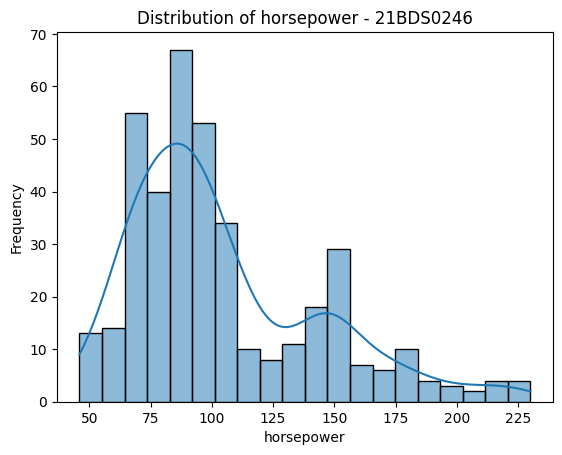

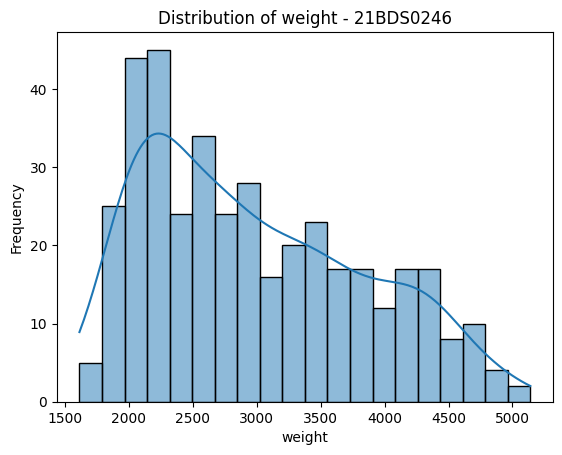

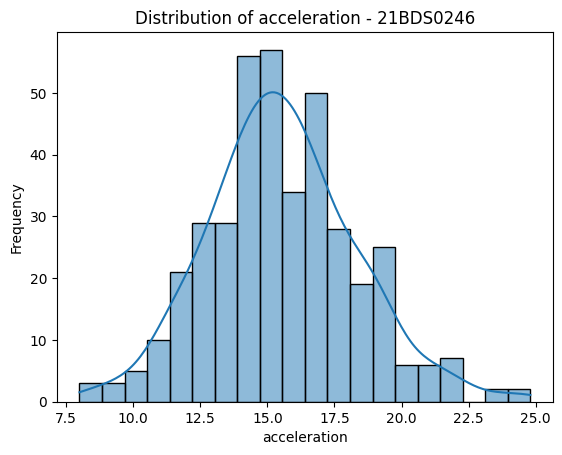

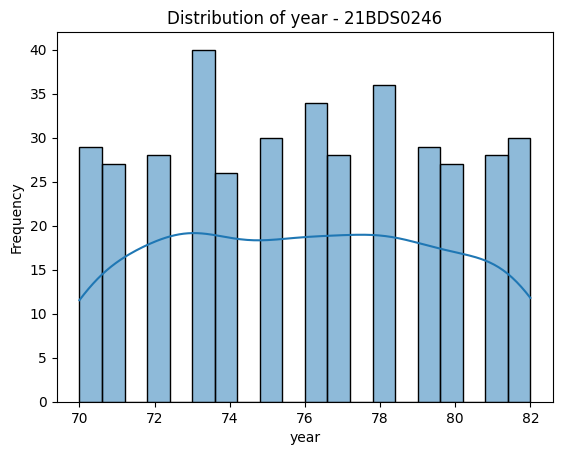

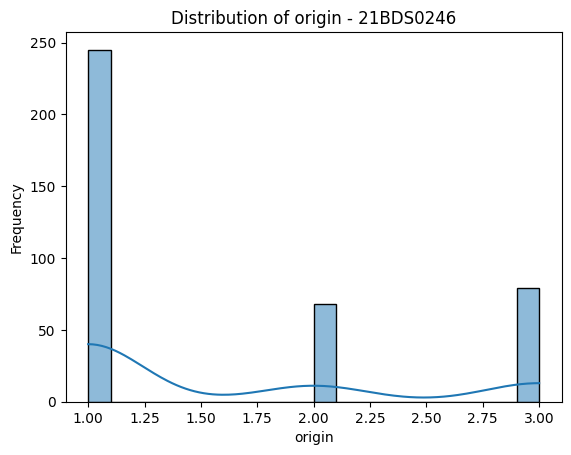


Frequency Distribution for name:
name
amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: count, Length: 301, dtype: int64


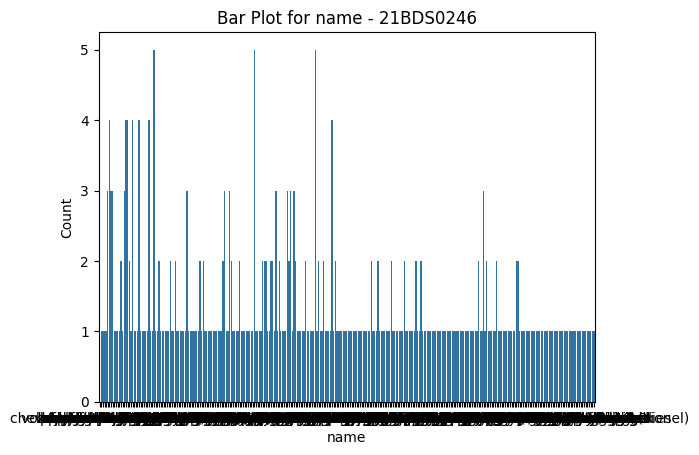


Measurement Scales:
mpg: Likely Interval or Ratio scale
cylinders: Likely Ordinal scale
displacement: Likely Interval or Ratio scale
horsepower: Likely Interval or Ratio scale
weight: Likely Interval or Ratio scale
acceleration: Likely Interval or Ratio scale
year: Likely Interval or Ratio scale
origin: Likely Ordinal scale
name: Nominal scale (categorical data)

Classical Summary of 'mpg':
Mean: 23.445918367346938
Standard Deviation: 7.805007486571799

Bayesian Estimation of 'mpg':
Posterior Mean: 24.547801663621012
Posterior Std Dev: 4.210182195111128


In [44]:
sourav_yadav = pd.read_csv("Auto.csv")
print("Dataset Information:")
print(sourav_yadav.info())
print("\nFirst 5 Rows of the Dataset:")
print(sourav_yadav.head())
print("\nMissing Values in Each Column:")
print(sourav_yadav.isnull().sum())

sourav_numerical_cols = sourav_yadav.select_dtypes(include=['int64', 'float64']).columns
sourav_categorical_cols = sourav_yadav.select_dtypes(include=['object']).columns

print("\nNumerical Columns:", list(sourav_numerical_cols))
print("Categorical Columns:", list(sourav_categorical_cols))
print("\nDescriptive Statistics for Numerical Columns:")
print(sourav_yadav[sourav_numerical_cols].describe())

for sourav_col in sourav_numerical_cols:
    plt.figure()
    sns.histplot(sourav_yadav[sourav_col].dropna(), kde=True, bins=20)
    plt.title(f"Distribution of {sourav_col} - 21BDS0246")
    plt.xlabel(sourav_col)
    plt.ylabel("Frequency")
    plt.show()

for sourav_col in sourav_categorical_cols:
    print(f"\nFrequency Distribution for {sourav_col}:")
    print(sourav_yadav[sourav_col].value_counts())

for sourav_col in sourav_categorical_cols:
    plt.figure()
    sns.countplot(x=sourav_col, data=sourav_yadav)
    plt.title(f"Bar Plot for {sourav_col} - 21BDS0246")
    plt.xlabel(sourav_col)
    plt.ylabel("Count")
    plt.show()

print("\nMeasurement Scales:")
for sourav_col in sourav_numerical_cols:
    if sourav_yadav[sourav_col].nunique() > 10:
        print(f"{sourav_col}: Likely Interval or Ratio scale")
    else:
        print(f"{sourav_col}: Likely Ordinal scale")

for sourav_col in sourav_categorical_cols:
    print(f"{sourav_col}: Nominal scale (categorical data)")

sourav_mean = sourav_yadav['mpg'].mean()
sourav_std = sourav_yadav['mpg'].std()
print("\nClassical Summary of 'mpg':")
print("Mean:", sourav_mean)
print("Standard Deviation:", sourav_std)

sourav_prior_mean = 25
sourav_prior_std = 5
sourav_posterior_mean = ((sourav_std**2 * sourav_prior_mean) + (sourav_prior_std**2 * sourav_mean)) / (sourav_std**2 + sourav_prior_std**2)
sourav_posterior_std = (sourav_std * sourav_prior_std) / ((sourav_std**2 + sourav_prior_std**2)**0.5)

print("\nBayesian Estimation of 'mpg':")
print("Posterior Mean:", sourav_posterior_mean)
print("Posterior Std Dev:", sourav_posterior_std)

Module:2 Data Transformation
Transformation Techniques: Performing data deduplication - replacing values –
Discretization and binning. Introduction to Missing data, handling missing data: Traditional
methods - Maximum Likelihood Estimation.

In [46]:
print("\nChecking for Duplicate Rows...")
sourav_initial_shape = sourav_yadav.shape
sourav_yadav = sourav_yadav.drop_duplicates()
sourav_final_shape = sourav_yadav.shape
print(f"Initial shape: {sourav_initial_shape}, Final shape after deduplication: {sourav_final_shape}")

sourav_yadav.replace('?', np.nan, inplace=True)
for sourav_col in sourav_yadav.columns:
    if sourav_yadav[sourav_col].dtype == 'object':
        sourav_yadav[sourav_col] = pd.to_numeric(sourav_yadav[sourav_col], errors='coerce')

print("\nData Types After Replacement and Conversion:")
print(sourav_yadav.dtypes)

sourav_yadav['mpg_binned'] = pd.cut(sourav_yadav['mpg'], bins=3, labels=['Low', 'Medium', 'High'])
print("\nBinned 'mpg' Column into Categories:\n", sourav_yadav['mpg_binned'].value_counts())

print("\nMissing Values in Each Column After Transformation:")
print(sourav_yadav.isnull().sum())

sourav_yadav_dropped = sourav_yadav.dropna()
print("\nShape After Dropping Rows with Missing Data:", sourav_yadav_dropped.shape)

sourav_yadav[sourav_numerical_cols] = sourav_yadav[sourav_numerical_cols].fillna(sourav_yadav[sourav_numerical_cols].mean())
print("\nMissing Values After Filling with Column Means in Numerical Columns:")
print(sourav_yadav[sourav_numerical_cols].isnull().sum())

print("\nSummary of Transformations Applied:")
print(f"Shape after deduplication: {sourav_final_shape}")
print("Values replaced, numerical columns binned, and missing values filled with column means.")



Checking for Duplicate Rows...
Initial shape: (392, 9), Final shape after deduplication: (392, 9)

Data Types After Replacement and Conversion:
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name            float64
dtype: object

Binned 'mpg' Column into Categories:
 mpg_binned
Low       182
Medium    168
High       42
Name: count, dtype: int64

Missing Values in Each Column After Transformation:
mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
year              0
origin            0
name            392
mpg_binned        0
dtype: int64

Shape After Dropping Rows with Missing Data: (0, 10)

Missing Values After Filling with Column Means in Numerical Columns:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year     

Module:3 Correlation Analysis and Time Series
Analysis
Types of analysis: Univariate analysis - bivariate analysis - multivariate analysis. Time Series
Analysis (TSA): Fundamentals of TSA - characteristics of TSA – Time based indexing -
visualizing time series – grouping time series data - resampling time series data.

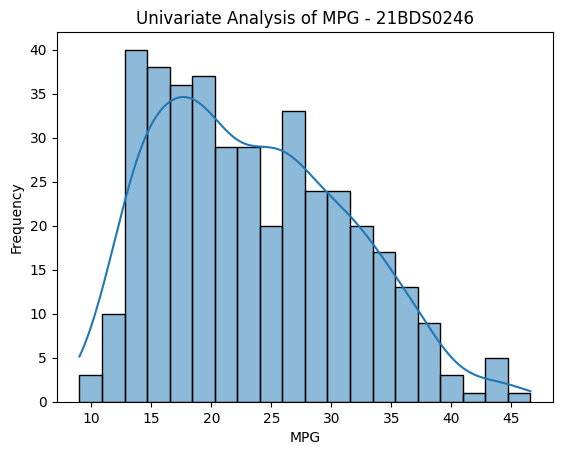

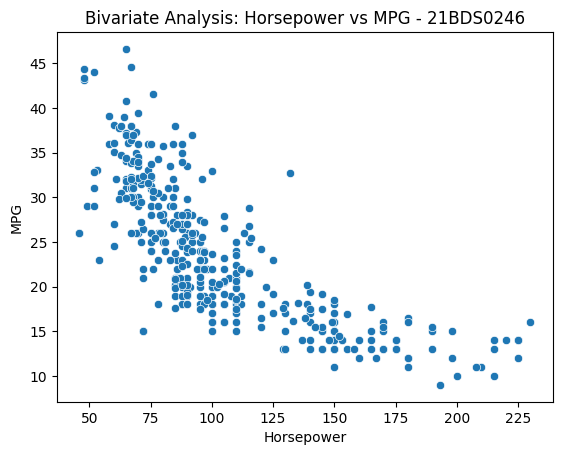

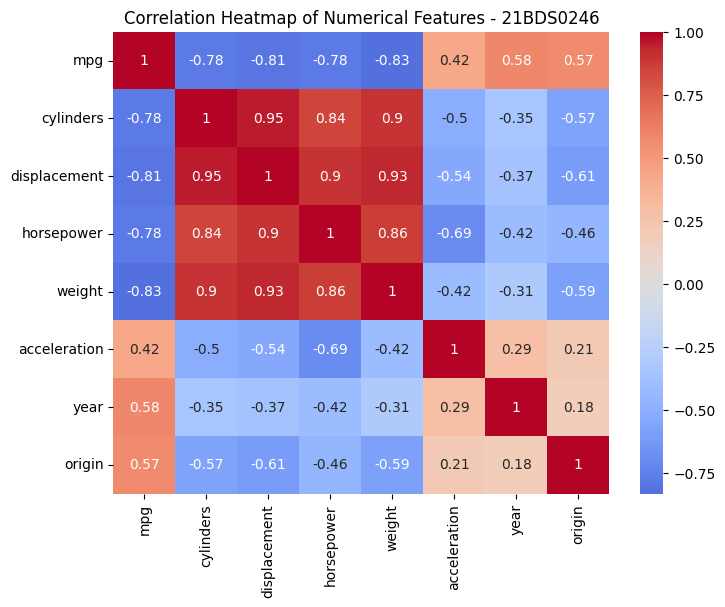

<ipython-input-47-298a8465b1ba>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sourav_y['date'] = pd.date_range(start='1970-01-01', periods=len(sourav_y), freq='M')


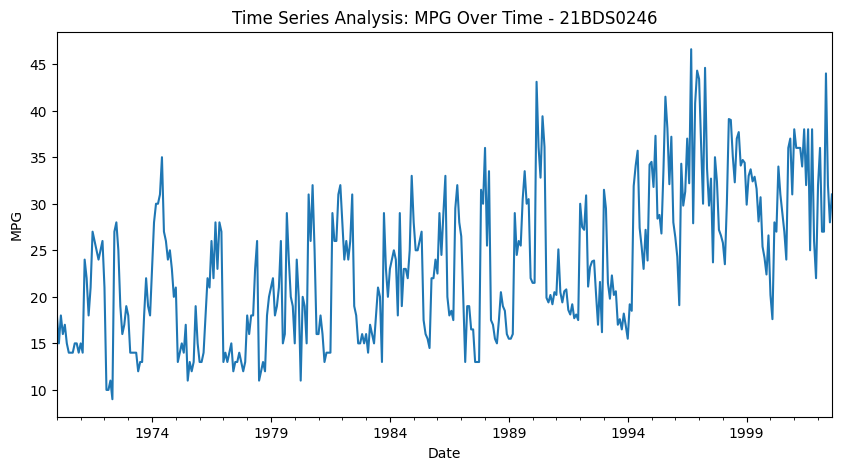

<ipython-input-47-298a8465b1ba>:32: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sourav_mpg_quarterly = sourav_y['mpg'].resample('Q').mean()


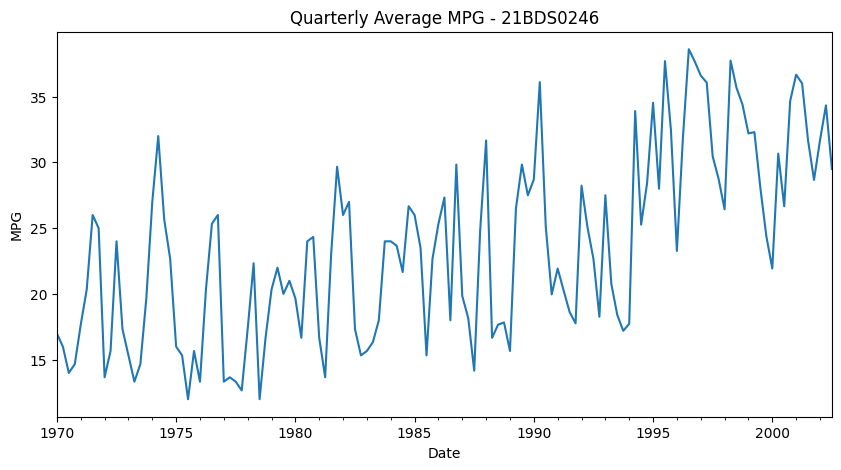

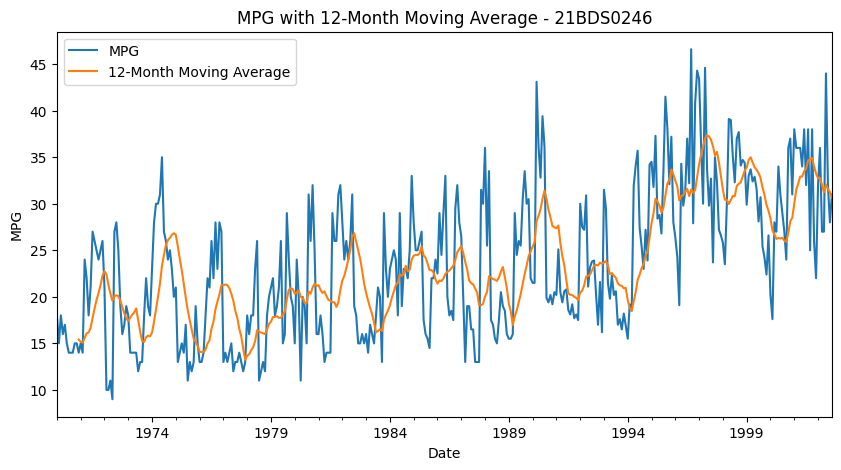

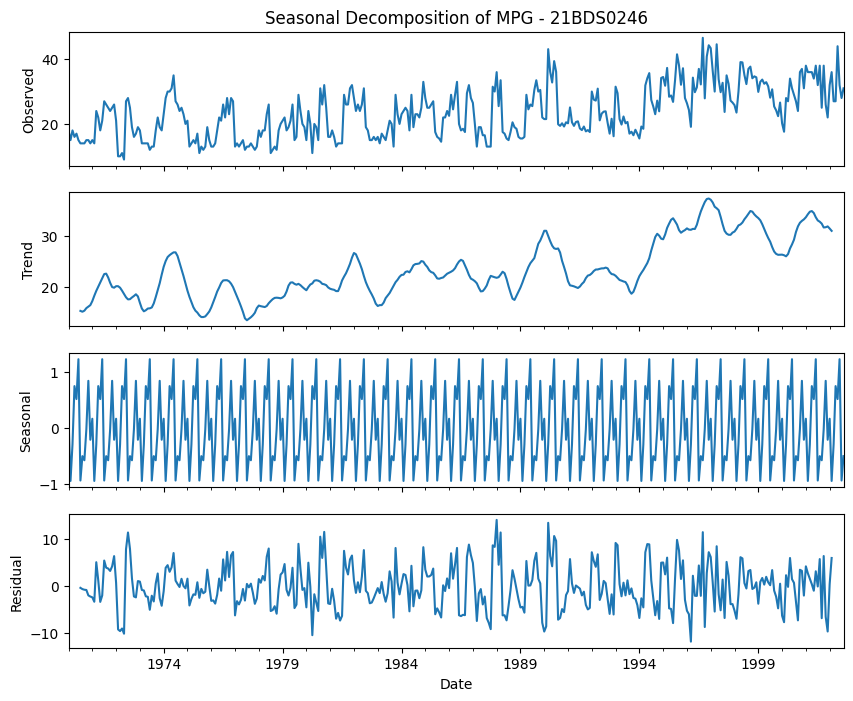

In [47]:
sourav_y = pd.read_csv("Auto.csv")
plt.figure()
sns.histplot(sourav_y['mpg'].dropna(), kde=True, bins=20)
plt.title("Univariate Analysis of MPG - 21BDS0246")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

sns.scatterplot(x='horsepower', y='mpg', data=sourav_y)
plt.title("Bivariate Analysis: Horsepower vs MPG - 21BDS0246")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

sourav_numerical_cols = sourav_y.select_dtypes(include=['int64', 'float64']).columns
sourav_correlation = sourav_y[sourav_numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sourav_correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features - 21BDS0246")
plt.show()

sourav_y['date'] = pd.date_range(start='1970-01-01', periods=len(sourav_y), freq='M')
sourav_y.set_index('date', inplace=True)

sourav_y['mpg'].plot(figsize=(10, 5))
plt.title("Time Series Analysis: MPG Over Time - 21BDS0246")
plt.xlabel("Date")
plt.ylabel("MPG")
plt.show()

sourav_mpg_quarterly = sourav_y['mpg'].resample('Q').mean()
sourav_mpg_quarterly.plot(figsize=(10, 5))
plt.title("Quarterly Average MPG - 21BDS0246")
plt.xlabel("Date")
plt.ylabel("MPG")
plt.show()

sourav_y['mpg_12mo_avg'] = sourav_y['mpg'].rolling(window=12).mean()
sourav_y[['mpg', 'mpg_12mo_avg']].plot(figsize=(10, 5))
plt.title("MPG with 12-Month Moving Average - 21BDS0246")
plt.xlabel("Date")
plt.ylabel("MPG")
plt.legend(["MPG", "12-Month Moving Average"])
plt.show()

sourav_decomposition = seasonal_decompose(sourav_y['mpg'].dropna(), model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
sourav_decomposition.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
ax1.set_title("Seasonal Decomposition of MPG - 21BDS0246")
sourav_decomposition.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
sourav_decomposition.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
sourav_decomposition.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
plt.xlabel("Date")
plt.show()


Module:4 Data Summarization and Visualization
Statistical summary measures, data elaboration, 1-D Statistical data analysis, 2-D Statistical
data Analysis, contingency tables, n-D Statistical data analysis. Visualization: Scatter plots –
Dot charts - Bar plots.


Statistical Summary Measures for Numerical Columns - 21BDS0246
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  mpg_12mo_avg  
count    392.000000  392.000000  392.000000    381.000000  
mean      15.541327   75.979592    1.576531     23.436920  
std        2.758864    3.683737    0.805518      5.741677  
min        8.000000   70.000000    1.000000    

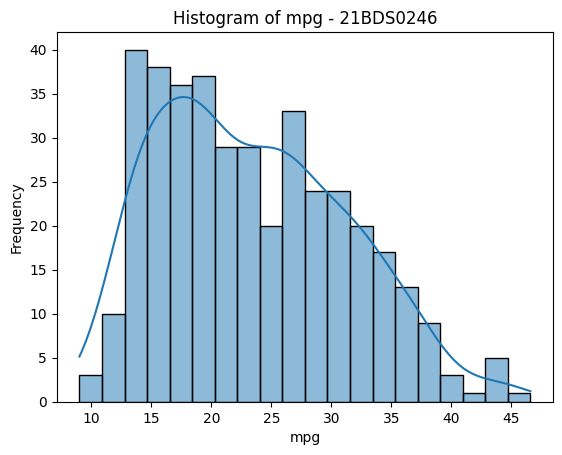

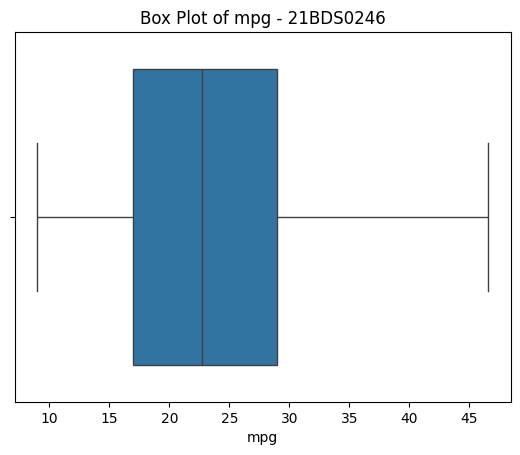

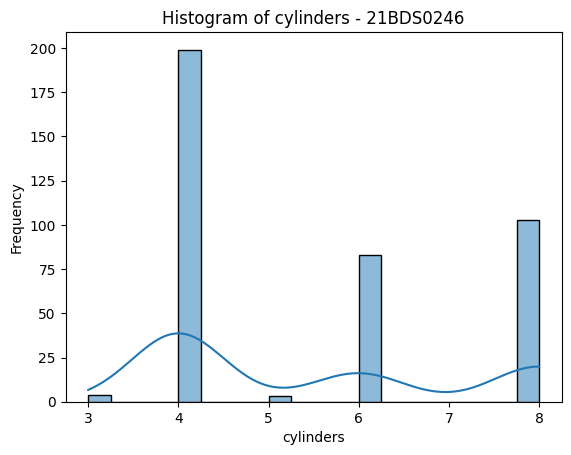

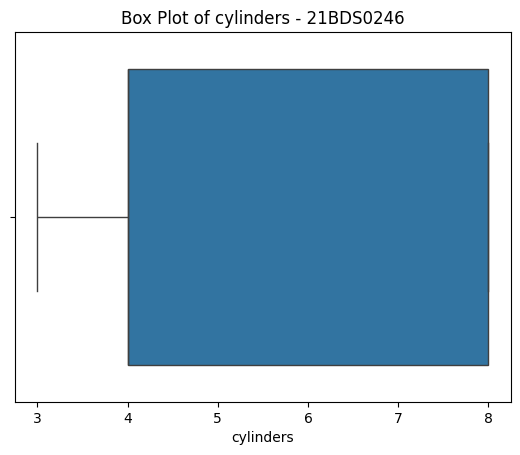

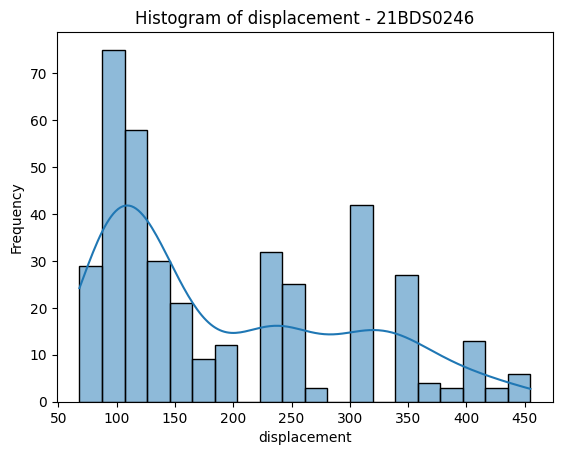

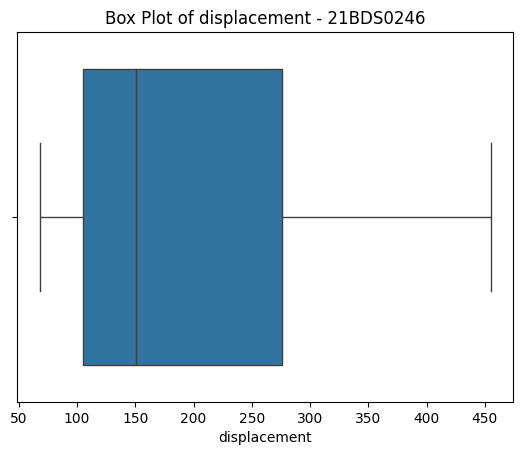

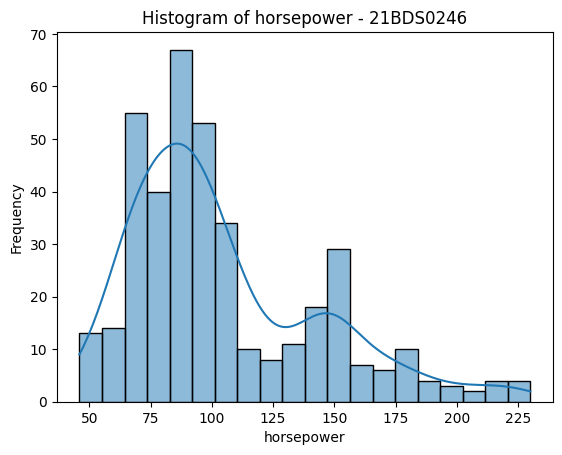

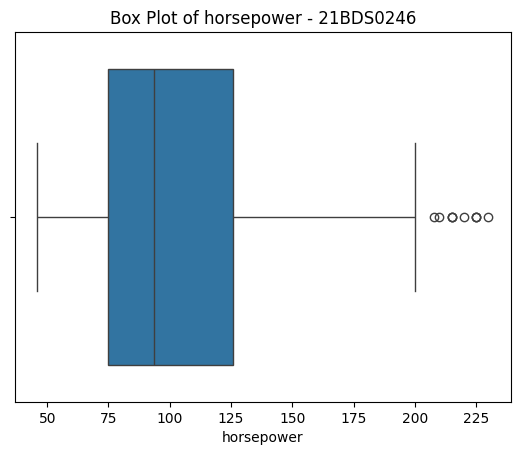

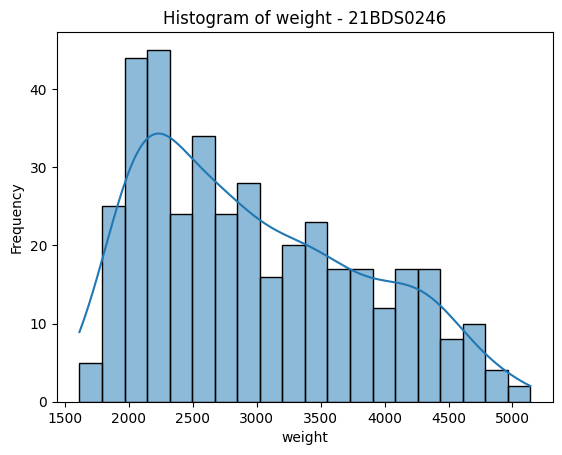

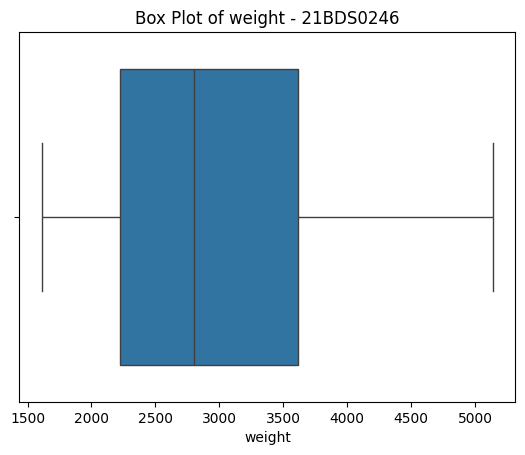

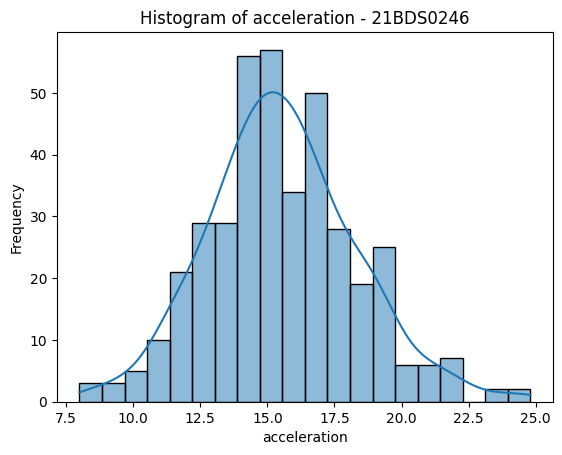

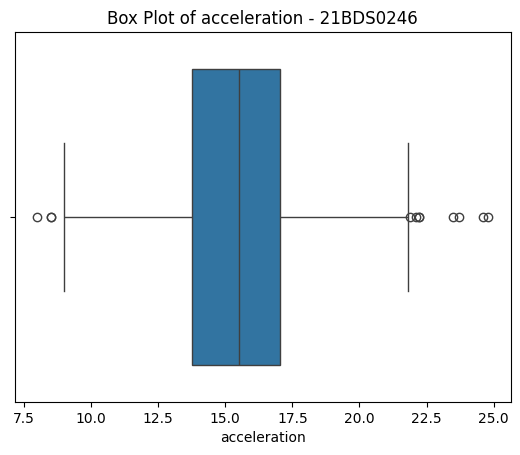

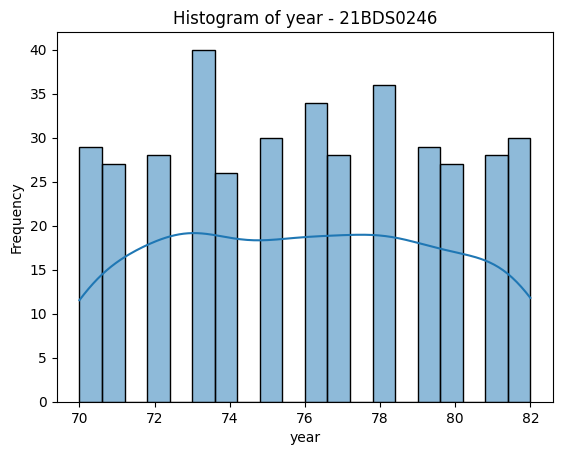

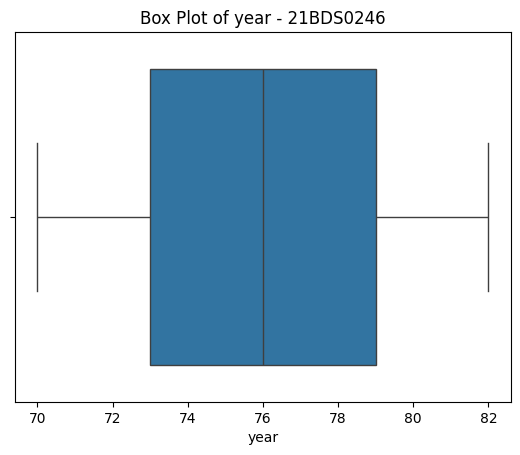

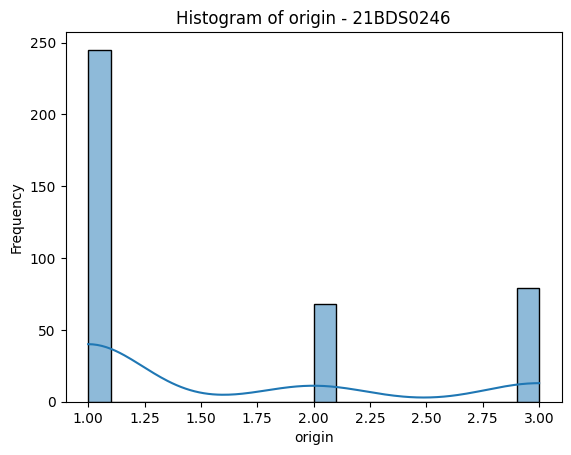

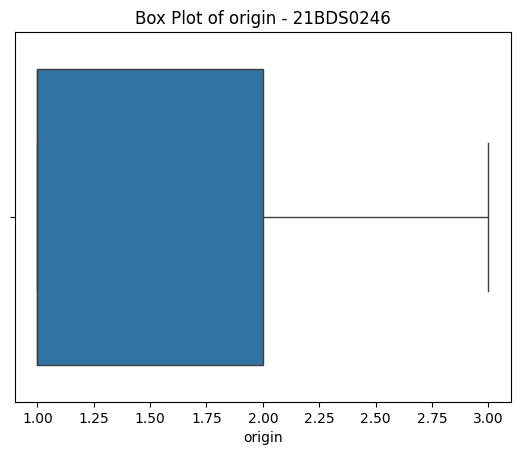

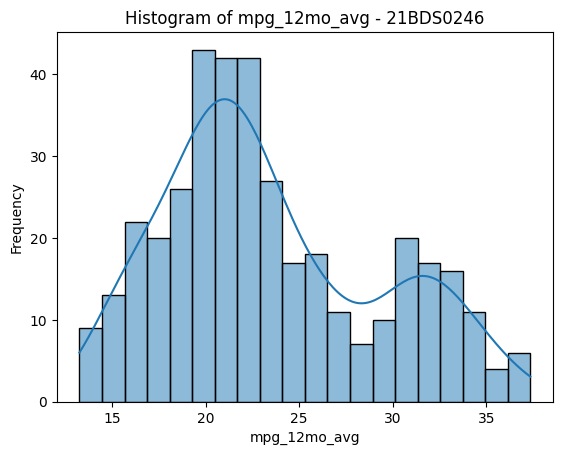

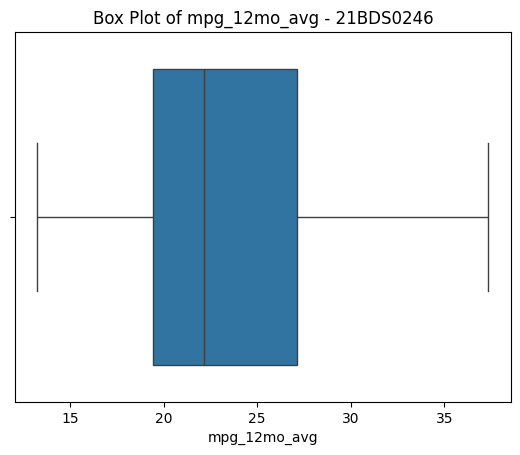

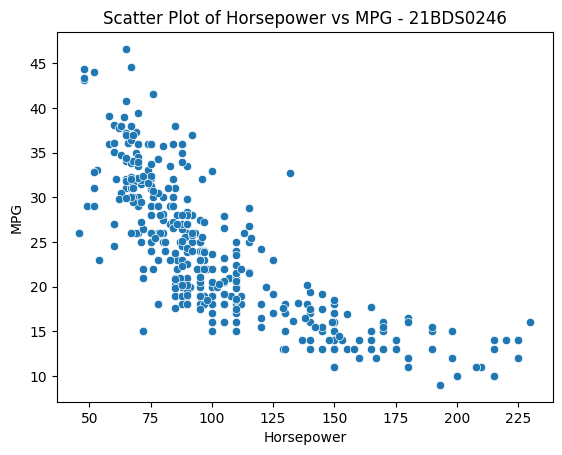


Contingency Table between Origin and Cylinders - 21BDS0246:
cylinders  3   4  5   6    8
origin                      
1          0  69  0  73  103
2          0  61  3   4    0
3          4  69  0   6    0


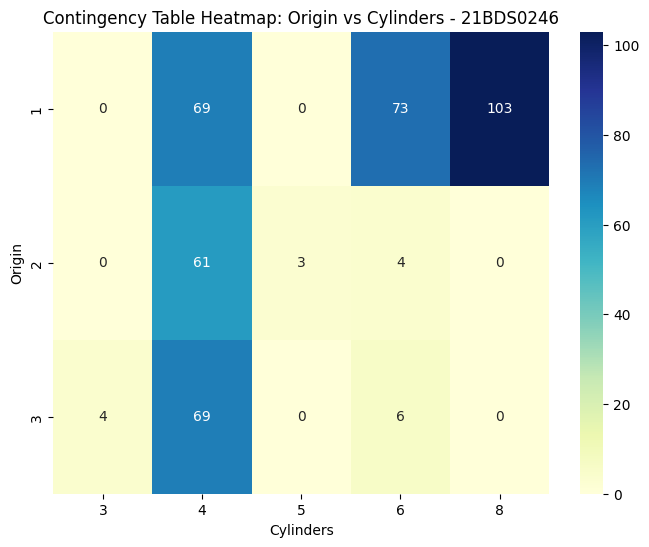

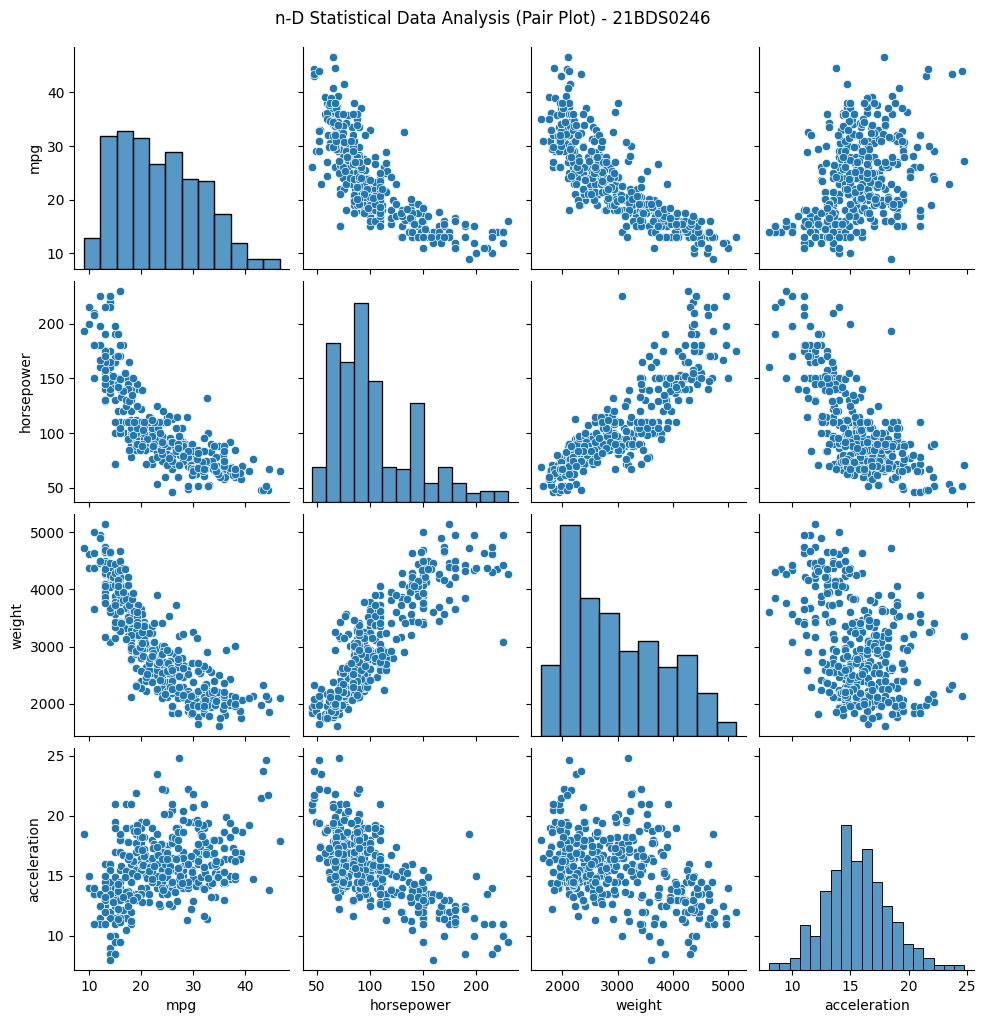

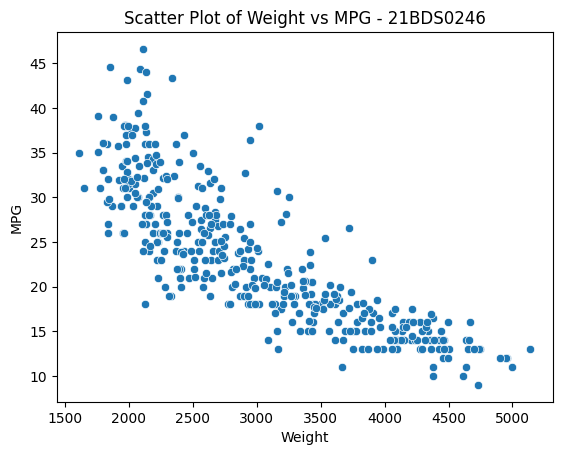

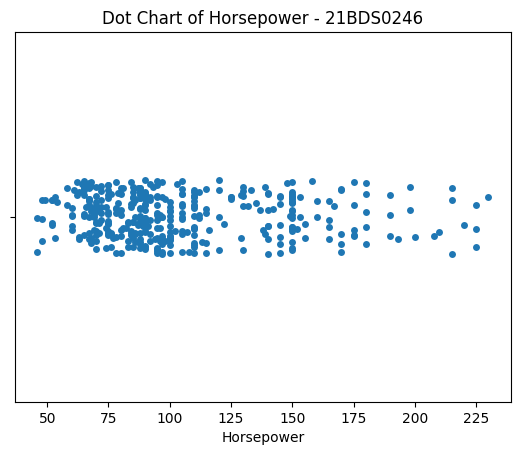

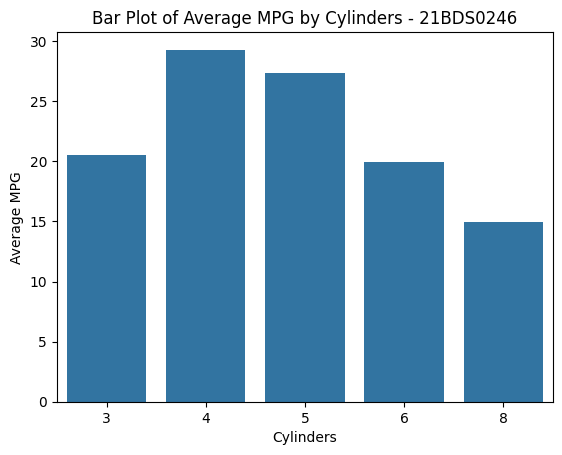

In [48]:
print("\nStatistical Summary Measures for Numerical Columns - 21BDS0246")
print(sourav_y.describe())

for col in sourav_y.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nQuantiles for {col} - 21BDS0246:")
    print(sourav_y[col].quantile([0.25, 0.5, 0.75]))

sourav_numerical_cols = sourav_y.select_dtypes(include=['int64', 'float64']).columns
for col in sourav_numerical_cols:
    plt.figure()
    sns.histplot(sourav_y[col].dropna(), kde=True, bins=20)
    plt.title(f"Histogram of {col} - 21BDS0246")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    sns.boxplot(x=sourav_y[col].dropna())
    plt.title(f"Box Plot of {col} - 21BDS0246")
    plt.xlabel(col)
    plt.show()

sns.scatterplot(x='horsepower', y='mpg', data=sourav_y)
plt.title("Scatter Plot of Horsepower vs MPG - 21BDS0246")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

if 'origin' in sourav_y.columns and 'cylinders' in sourav_y.columns:
    sourav_contingency_table = pd.crosstab(sourav_y['origin'], sourav_y['cylinders'])
    print("\nContingency Table between Origin and Cylinders - 21BDS0246:")
    print(sourav_contingency_table)

    plt.figure(figsize=(8, 6))
    sns.heatmap(sourav_contingency_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.title("Contingency Table Heatmap: Origin vs Cylinders - 21BDS0246")
    plt.xlabel("Cylinders")
    plt.ylabel("Origin")
    plt.show()

sns.pairplot(sourav_y[['mpg', 'horsepower', 'weight', 'acceleration']].dropna())
plt.suptitle("n-D Statistical Data Analysis (Pair Plot) - 21BDS0246", y=1.02)
plt.show()

sns.scatterplot(x='weight', y='mpg', data=sourav_y)
plt.title("Scatter Plot of Weight vs MPG - 21BDS0246")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

plt.figure()
sns.stripplot(x='horsepower', data=sourav_y, jitter=True)
plt.title("Dot Chart of Horsepower - 21BDS0246")
plt.xlabel("Horsepower")
plt.show()

if 'cylinders' in sourav_y.columns:
    sourav_avg_mpg_by_cylinder = sourav_y.groupby('cylinders')['mpg'].mean().reset_index()
    sns.barplot(x='cylinders', y='mpg', data=sourav_avg_mpg_by_cylinder)
    plt.title("Bar Plot of Average MPG by Cylinders - 21BDS0246")
    plt.xlabel("Cylinders")
    plt.ylabel("Average MPG")
    plt.show()


Module:5 Clustering Algorithms
Introduction to Spectral clustering – Document clustering – Minimum Spanning Tree
clustering. Overview of Model-based clustering – Expectation-Maximization algorithm –
Hierarchical Agglomerative model-based clustering. Outlier detection using Clustering.

Module:6 Dimensionality Reduction
Linear Methods: Principal Component Analysis (PCA) – Singular Value Decomposition –
Factor Analysis -Intrinsic Dimensionality. Non Linear methods: Multidimensional Scaling –
Manifold Learning – Self-Organizing Maps.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

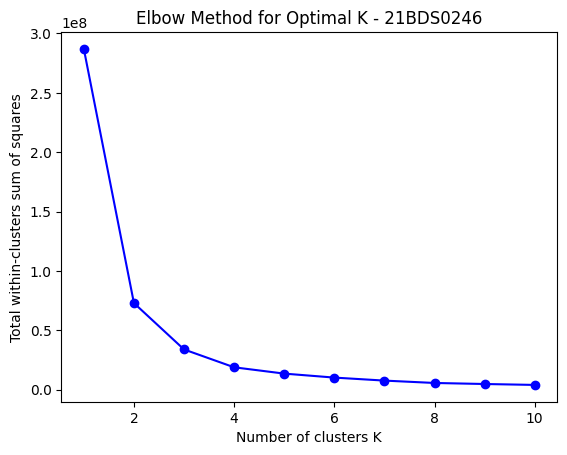

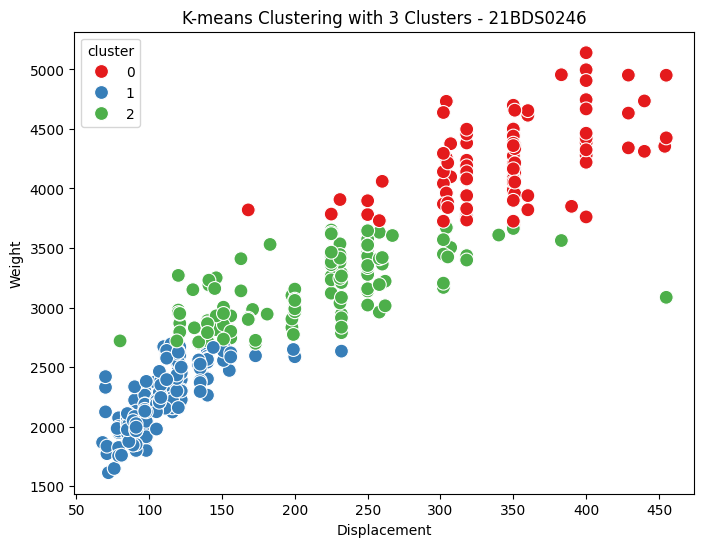

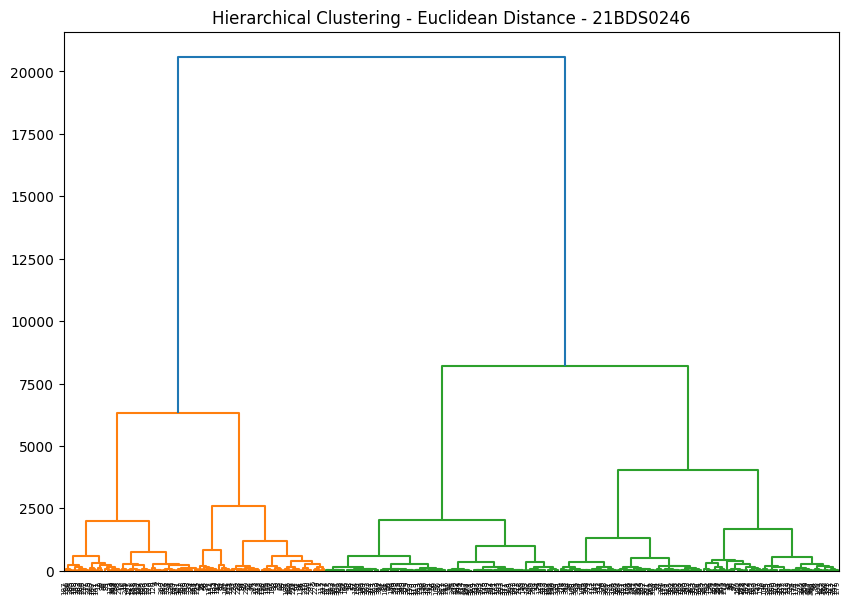

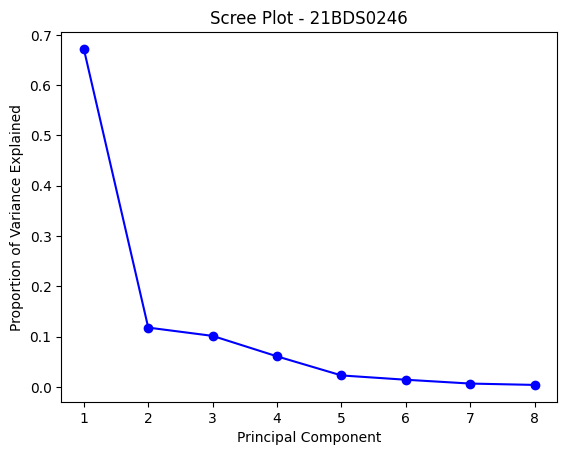

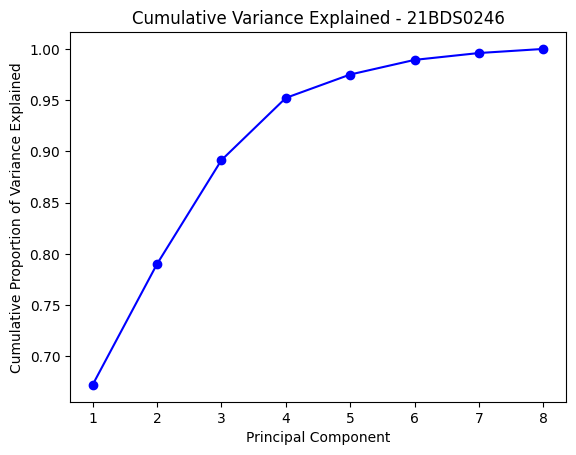

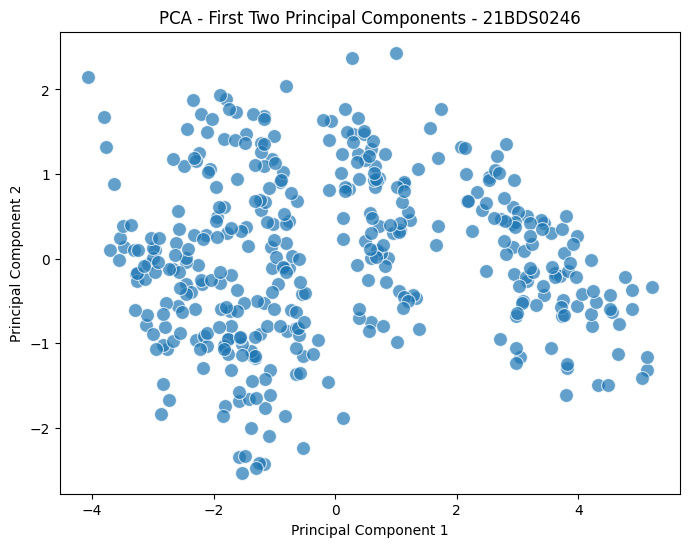

In [49]:
s_yadav = pd.read_csv("Auto.csv")
print(s_yadav.info())

print(s_yadav.describe())

s_yadav = s_yadav.dropna()
s_yadav = s_yadav.select_dtypes(include=[np.number])
print(s_yadav.describe())

def calculate_wss(data, max_k):
    wss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)
    return wss

wss_values = calculate_wss(s_yadav, 10)
plt.plot(range(1, 11), wss_values, 'bo-')
plt.xlabel("Number of clusters K")
plt.ylabel("Total within-clusters sum of squares")
plt.title("Elbow Method for Optimal K - 21BDS0246")
plt.show()

kmeans = KMeans(n_clusters=3, n_init=10)
s_yadav['cluster'] = kmeans.fit_predict(s_yadav)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=s_yadav, x="displacement", y="weight", hue="cluster", palette="Set1", s=100)
plt.title("K-means Clustering with 3 Clusters - 21BDS0246")
plt.xlabel("Displacement")
plt.ylabel("Weight")
plt.show()

linked = linkage(s_yadav, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering - Euclidean Distance - 21BDS0246")
plt.show()

scaler = StandardScaler()
s_yadav_scaled = scaler.fit_transform(s_yadav.drop('cluster', axis=1))
pca_result = PCA().fit(s_yadav_scaled)
explained_variance = pca_result.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot - 21BDS0246")
plt.show()

cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.title("Cumulative Variance Explained - 21BDS0246")
plt.show()

pca_df = pd.DataFrame(pca_result.transform(s_yadav_scaled)[:, :2], columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title("PCA - First Two Principal Components - 21BDS0246")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Module:7 Model Development and Evaluation 4 hours
Constructing linear regression model – evaluation – computing accuracy – understanding
accuracy. Understanding reinforcement learning: Difference between supervised and
reinforcement learning – Applications of reinforcement learning.

In [50]:
df = df.dropna()
print(df.describe())

X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000